In [890]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge , LinearRegression , Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import StandardScaler

In [891]:
df = pd.read_csv('./diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [892]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [893]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

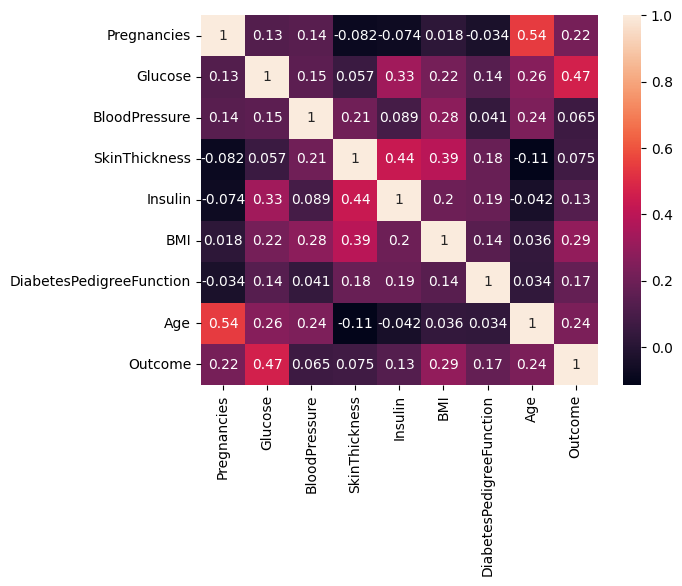

In [894]:
corr = df.corr()
sns.heatmap(corr , annot= True)

In [895]:
X = df.drop('Outcome',axis=1)
Y = df['Outcome']
X,Y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

In [896]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [897]:
model_L = LinearRegression()
model_L.fit(X_train,y_train)

LinearRegression()

In [898]:
model_L.score(X_train,y_train)

0.3174348783798745

In [899]:
model_L.score(X_test,y_test)

0.2544038741278336

In [900]:
model_La = Lasso()
model_La.fit(X_train,y_train)

Lasso()

In [901]:
model_La.score(X_train,y_train)

0.23426925730653891

In [902]:
model_La.score(X_test,y_test)

0.1617610039768389

In [903]:
model_R = Ridge()
model_R.fit(X_train,y_train)

Ridge()

In [904]:
model_R.score(X_train,y_train)

0.31743262553547613

In [905]:
model_R.score(X_test,y_test)


0.2542745512566582

In [906]:
# BloodPressure , SkinThickness 
X = df.drop(['Outcome','BloodPressure','SkinThickness'],axis=1)
Y = df['Outcome']
X,Y

(     Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction  Age
 0              6      148        0  33.6                     0.627   50
 1              1       85        0  26.6                     0.351   31
 2              8      183        0  23.3                     0.672   32
 3              1       89       94  28.1                     0.167   21
 4              0      137      168  43.1                     2.288   33
 ..           ...      ...      ...   ...                       ...  ...
 763           10      101      180  32.9                     0.171   63
 764            2      122        0  36.8                     0.340   27
 765            5      121      112  26.2                     0.245   30
 766            1      126        0  30.1                     0.349   47
 767            1       93        0  30.4                     0.315   23
 
 [768 rows x 6 columns],
 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766   

In [907]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [908]:
model_L = LinearRegression()
model_L.fit(X_train,y_train)

LinearRegression()

In [909]:
model_L.score(X_train,y_train)

0.30744511655983675

In [910]:
model_L.score(X_test,y_test)

0.24142786650397086

In [911]:
model_La = Lasso()
model_La.fit(X_train,y_train)

Lasso()

In [912]:
model_La.score(X_train,y_train)

0.22582256261809297

In [913]:
model_La.score(X_test,y_test)

0.18174296872408746

In [914]:
model_R = Ridge()
model_R.fit(X_train,y_train)

Ridge()

In [915]:
model_R.score(X_train,y_train)

0.3074414782761634

In [916]:
model_R.score(X_test,y_test)


0.24171820745865846

In [917]:
# Pregnancies		BloodPressure	SkinThickness	Insulin		DiabetesPedigreeFunction
df.drop(
    [
        "Pregnancies",
        "BloodPressure",
        "SkinThickness",
        "Insulin",
        "DiabetesPedigreeFunction",
    ],
    axis=1,inplace=True
)



In [918]:
df

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1
...,...,...,...,...
763,101,32.9,63,0
764,122,36.8,27,0
765,121,26.2,30,0
766,126,30.1,47,1


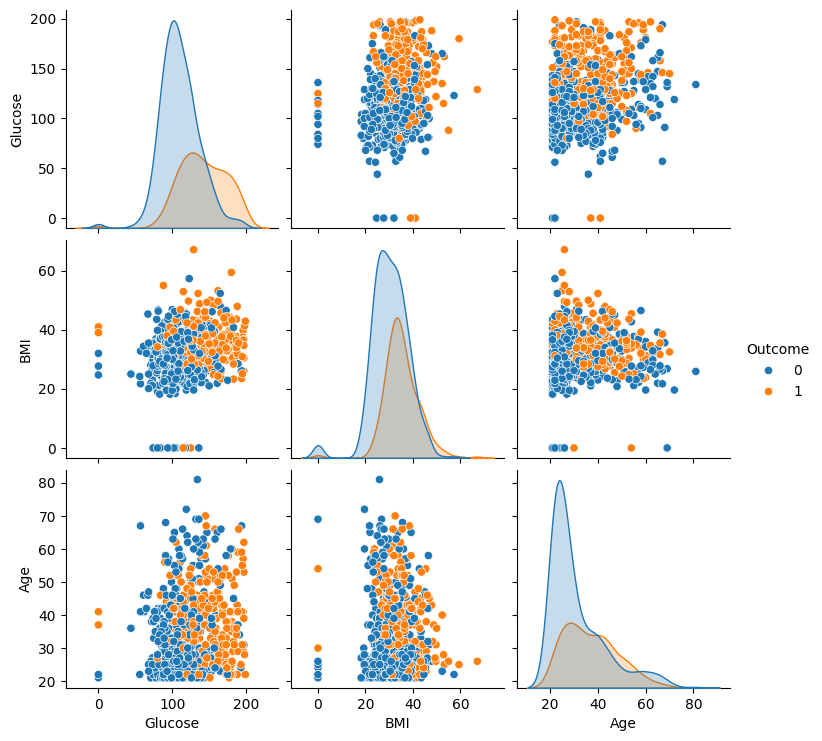

In [919]:
sns.pairplot(df, hue="Outcome")

In [920]:
df.describe()

,Glucose,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000
mean,120.894531,31.992578,33.240885,0.348958
std,31.972618,7.884160,11.760232,0.476951
min,0.000000,0.000000,21.000000,0.000000
25%,99.000000,27.300000,24.000000,0.000000
50%,117.000000,32.000000,29.000000,0.000000
75%,140.250000,36.600000,41.000000,1.000000
max,199.000000,67.100000,81.000000,1.000000


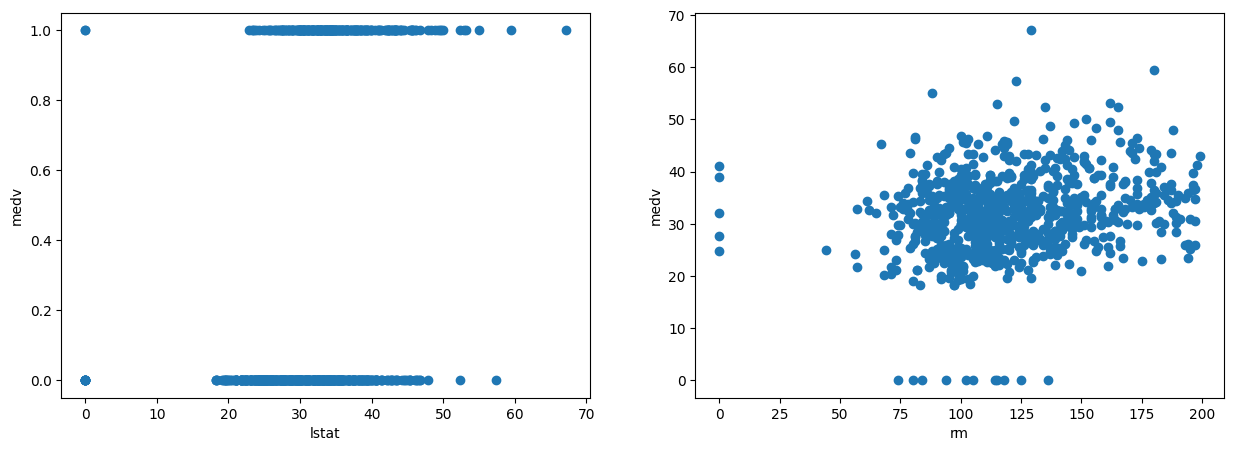

In [921]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(df['BMI'].values,df['Outcome'].values)
plt.ylabel('medv')
plt.xlabel('lstat')
plt.subplot(1,2,2)
plt.scatter(df['Glucose'].values,df['BMI'].values)
plt.ylabel('medv')
plt.xlabel('rm')

plt.show()

In [961]:
df_filtered = df[(df['BMI'] != 0)&df['Glucose'] != 0]
df_filtered = df_filtered[(df['BMI'] < 50)]
print(df_filtered.describe())

          Glucose         BMI         Age     Outcome
count  379.000000  379.000000  379.000000  379.000000
mean   121.997361   32.069657   32.659631    0.327177
std     31.516645    6.651193   11.596740    0.469803
min     57.000000   18.200000   21.000000    0.000000
25%     99.000000   27.050000   23.500000    0.000000
50%    117.000000   32.100000   29.000000    0.000000
75%    141.000000   36.350000   38.500000    1.000000
max    199.000000   49.300000   72.000000    1.000000


C:\Users\Taha\AppData\Local\Temp\ipykernel_11888\3559726617.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(df['BMI'] < 50)]


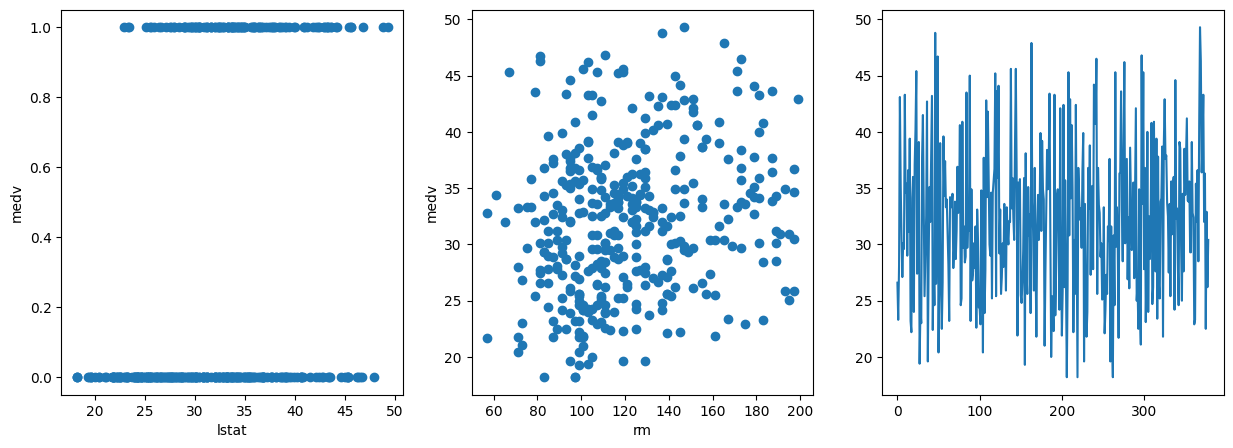

In [962]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df_filtered['BMI'].values,df_filtered['Outcome'].values)
plt.ylabel('medv')
plt.xlabel('lstat')
plt.subplot(1,3,2)
plt.scatter(df_filtered['Glucose'].values,df_filtered['BMI'].values)
plt.ylabel('medv')
plt.xlabel('rm')
plt.subplot(1,3,3)
plt.plot(df_filtered['BMI'].values)
plt.show()

In [963]:
# BloodPressure , SkinThickness 
X = df.drop(['Outcome'],axis=1)
Y = df['Outcome']
X,Y

(     Glucose   BMI  Age
 0        148  33.6   50
 1         85  26.6   31
 2        183  23.3   32
 3         89  28.1   21
 4        137  43.1   33
 ..       ...   ...  ...
 763      101  32.9   63
 764      122  36.8   27
 765      121  26.2   30
 766      126  30.1   47
 767       93  30.4   23
 
 [768 rows x 3 columns],
 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: Outcome, Length: 768, dtype: int64)

In [988]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [989]:
model_filter = LinearRegression()
model_filter.fit(X_train,y_train)

LinearRegression()

In [990]:
model_filter.score(X_train,y_train)

0.2796367469049882

In [991]:
model_filter.score(X_test,y_test)

0.23831729498800247